In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import sklearn.linear_model as linear_model

# Q1 - Q2

   year     gnp  invest     cpi  interest
0  1968   873.4   133.3   82.54      5.16
1  1969   944.0   149.3   86.79      5.87
2  1970   992.7   144.2   91.45      5.95
3  1971  1077.6   166.4   96.01      4.88
4  1972  1185.9   195.0  100.00      4.50


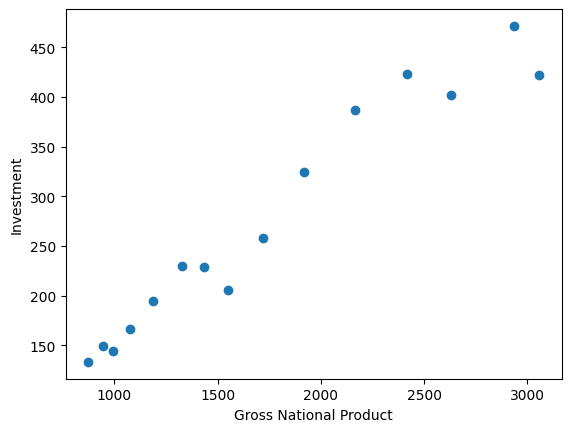

In [2]:
# import data
df = pd.read_csv('invest.csv')
# print as a table containing first 5 observations
print(df.head())

# plot the data gnp and invest
plt.scatter(df['gnp'], df['invest'])
plt.xlabel('Gross National Product')
plt.ylabel('Investment')

X = np.array(np.log(df['gnp']))
Y = np.array(np.log(df['invest']))

# Q3 - Q6

-----------------Q3-----------------
Estimated coefficients:
beta0_hat =  -1.9635913352301815
beta1_hat =  1.015281401598871
standard deviation of the error:  0.08761471654613967
R-squared:  0.9627572956057855
Estimated variance of the coefficients:
variance_beta0_hat =  0.16721721182234303
variance_beta1_hat =  0.0030672833742692693
-----------------Q4-----------------
t-statistic for beta1_hat:  18.331984456866678
p-value for beta1_hat:  1.1363709973011282e-10
-----------------Q5-----------------
Investment for GNP = 1000:  155.97942793105494
confidence interval:  [5.17958750e+67 5.85752981e+67]
prediction interval:  [4.66143154e+67 6.50864181e+67]
-----------------Q6-----------------


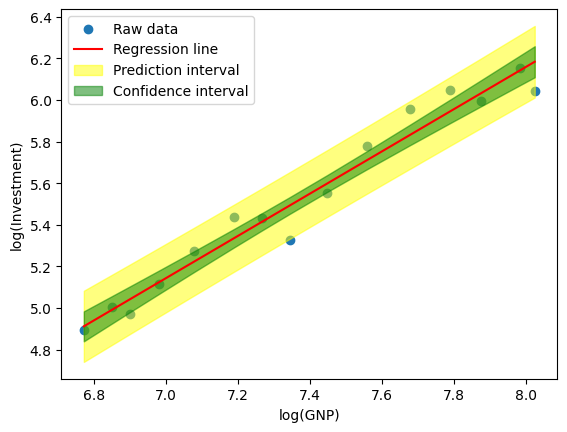

In [3]:
X_mean = np.mean(X)
Y_mean = np.mean(Y)
# Q3
print('-----------------Q3-----------------')
beta1_hat = np.sum((X - X_mean) * (Y - Y_mean)) / np.sum((X - X_mean) ** 2)
beata0_hat = Y_mean - beta1_hat * X_mean

Y_pred = beata0_hat + beta1_hat * X

epsilon = Y - Y_pred

sigma_hat = np.sqrt(np.sum(epsilon ** 2) / (len(X) - 2))
var_beta1_hat = sigma_hat ** 2 / np.sum((X - X_mean) ** 2)
var_beta0_hat = sigma_hat ** 2 * np.mean(X) ** 2 / np.sum((X - X_mean) ** 2)
r2 = 1 - np.sum((Y - Y_pred) ** 2) / np.sum((Y - Y_mean) ** 2)

print('Estimated coefficients:')
print('beta0_hat = ', beata0_hat)
print('beta1_hat = ', beta1_hat)
print('standard deviation of the error: ', sigma_hat)
print('R-squared: ', r2)
# print the estimated variance of the coefficients
print('Estimated variance of the coefficients:')
print('variance_beta0_hat = ', var_beta0_hat)
print('variance_beta1_hat = ', var_beta1_hat)

# Q4
print('-----------------Q4-----------------')
# test significance of the estimated coefficients beta1_hat by using t-test
t_stat = beta1_hat / np.sqrt(var_beta1_hat)
print('t-statistic for beta1_hat: ', t_stat)
# calculate the p-value
p_value = 2 * (1 - stats.t.cdf(t_stat, len(X) - 2))
print('p-value for beta1_hat: ', p_value)

# Q5
print('-----------------Q5-----------------')
gnp = 1000
invest_pred = np.exp(beata0_hat + beta1_hat * np.log(gnp))
print('Investment for GNP = 1000: ', invest_pred)
# calculate the confidence interval for the 90% level
alpha = 0.1
t_stat = stats.t.ppf(1 - alpha/2, len(X) - 2)
conf_int = invest_pred + t_stat * sigma_hat * np.sqrt(1 / len(X) + (np.log(gnp) - X_mean) ** 2 / np.sum((X - X_mean) ** 2)) * np.array([-1, 1])
print('confidence interval: ', np.exp(conf_int))
# calculate the prediction interval for the 90% level
pred_int = invest_pred + t_stat * sigma_hat * np.sqrt(1 + 1 / len(X) + (np.log(gnp) - X_mean) ** 2 / np.sum((X - X_mean) ** 2)) * np.array([-1, 1])
print('prediction interval: ', np.exp(pred_int))

# Q6
print('-----------------Q6-----------------')

def pred_fun(x):
    return beata0_hat + beta1_hat * x
def conf_int_fun(x):
    return t_stat * sigma_hat * np.sqrt(1 / len(X) + (x - X_mean) ** 2 / np.sum((X - X_mean) ** 2))
def pred_int_fun(x):
    return t_stat * sigma_hat * np.sqrt(1 + 1 / len(X) + (x - X_mean) ** 2 / np.sum((X - X_mean) ** 2))

plt.figure()
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.fill_between(X, pred_fun(X) - pred_int_fun(X), pred_fun(X) + pred_int_fun(X), color='yellow', alpha=0.5)
plt.fill_between(X, pred_fun(X) - conf_int_fun(X), pred_fun(X) + conf_int_fun(X), color='green', alpha=0.5)
plt.xlabel('log(GNP)')
plt.ylabel('log(Investment)')
plt.legend(['Raw data', 'Regression line', 'Prediction interval', 'Confidence interval'])
plt.show()


# Q7 - Q8

-----------------Q7-----------------
Estimated coefficients:
beta0_hat =  -1.9635913352301833
beta1_hat =  1.0152814015988711
R-squared:  1.0
Investment for GNP = 1000:  [155.97942793]
-----------------Q8-----------------


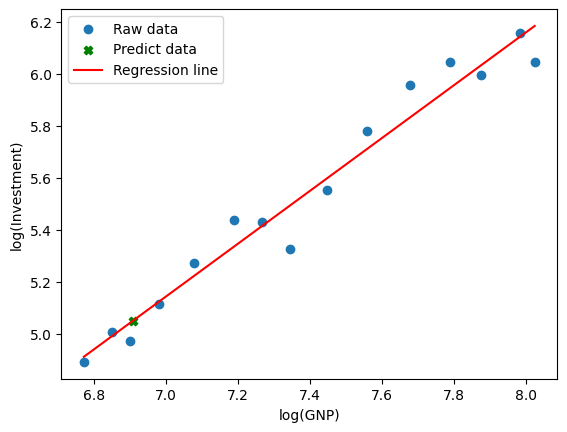

In [8]:
# Q7
# using sklearn to calculate the coefficients
print('-----------------Q7-----------------')
reg = linear_model.LinearRegression().fit(X.reshape(-1, 1), Y)
beta1_hat = reg.coef_[0]
beata0_hat = reg.intercept_
Y_pred = reg.predict(X.reshape(-1, 1))

# sigma_hat = np.sqrt(np.sum(epsilon ** 2) / (len(X) - 2))
# var_beta1_hat = sigma_hat ** 2 / np.sum((X - X_mean) ** 2)
# var_beta0_hat = sigma_hat ** 2 * np.mean(X) ** 2 / np.sum((X - X_mean) ** 2)
r2 = reg.score(X.reshape(-1, 1),Y_pred)
print('Estimated coefficients:')
print('beta0_hat = ', beata0_hat)
print('beta1_hat = ', beta1_hat)
# print('standard deviation of the error: ', sigma_hat)
print('R-squared: ', r2)
# print the estimated variance of the coefficients
# print('Estimated variance of the coefficients:')
# print('variance_beta0_hat = ', var_beta0_hat)
# print('variance_beta1_hat = ', var_beta1_hat)

invest_pred = reg.predict(np.log(gnp).reshape(-1, 1))
print('Investment for GNP = 1000: ', np.exp(invest_pred))

# Q8
print('-----------------Q8-----------------')
plt.figure()
plt.scatter(X, Y)
plt.scatter(np.log(gnp), invest_pred, color='green', marker='X')
plt.plot(X, reg.predict(X.reshape(-1, 1)), color='red')
plt.xlabel('log(GNP)')
plt.ylabel('log(Investment)')
plt.legend(['Raw data', 'Predict data', 'Regression line'])
plt.show()


# Q9 - Q12

In [31]:
X = np.array([np.ones(len(df['gnp'])), np.log(df['gnp']), df['interest']]).T
Y = np.array(np.log(df['invest']))

# Q9
print('-----------------Q9-----------------')
gram_matrix = np.dot(X.T, X)
print('Gram matrix:')
print(gram_matrix)
rank = np.linalg.matrix_rank(gram_matrix)
print('Rank of Gram matrix: ', rank)
print('Full rank: ', rank == len(gram_matrix))

# Q10
print('-----------------Q10-----------------')
# calculate the coefficients and the variance of the coefficients
beta_hat = np.dot(np.dot(np.linalg.inv(gram_matrix), X.T), Y)
Y_pred = np.dot(X, beta_hat)
epsilon = Y - Y_pred
sigma_hat = np.sqrt(np.sum(epsilon ** 2) / (len(X) - 2))
var_beta_hat = sigma_hat ** 2 * np.linalg.inv(gram_matrix)
r2 = 1 - np.sum((Y - Y_pred) ** 2) / np.sum((Y - Y_mean) ** 2)
print('Estimated coefficients:')
print('beta_hat = ', beta_hat)
print('standard deviation of the error: ', sigma_hat)
print('R-squared: ', r2)
# using t-test to test the significance of the coefficients
t_stat = beta_hat / np.sqrt(np.diag(var_beta_hat))
print('t-statistic for beta_hat: ', t_stat)
# calculate the p-value
p_value = np.zeros(len(t_stat))
for col in range(len(t_stat)):
    if (col % 2 == 0):
        p_value[col] = 2 * stats.t.cdf(t_stat[col], len(X) - 3)
    else:
        p_value[col] = 2 * (1 - stats.t.cdf(t_stat[col], len(X) - 3))
print('p-value for beta_hat: ', p_value)

# Q11
print('-----------------Q11-----------------')
# For the values of GNP  1000 and Interest  10, predict the log(Investment) and provide confident
# and prediction intervals at the 99:9% level.
interest = 10
invest_pred = np.dot(np.array([1, np.log(gnp), interest]), beta_hat)
print('Investment for GNP = 1000 and Interest = 10: ', invest_pred)
# calculate the confidence interval for the 99.9% level
alpha = 0.001
t_stat = stats.t.ppf(1 - alpha/2, len(X) - 3)
# conf_int = invest_pred + t_stat * sigma_hat * np.sqrt(np.dot(np.dot(np.array([1, np.log(gnp), interest]), np.linalg.inv(gram_matrix)), np.array([1, np.log(gnp), interest]))) * np.array([-1, 1])


-----------------Q9-----------------
Gram matrix:
[[ 15.         110.75282116 111.79      ]
 [110.75282116 820.24847688 839.18854302]
 [111.79       839.18854302 943.8557    ]]
Rank of Gram matrix:  3
Full rank:  True
-----------------Q10-----------------
Estimated coefficients:
beta_hat =  [-2.18045473  1.05124269 -0.00652888]
standard deviation of the error:  0.08696117412440567
R-squared:  0.9633108306726244
t-statistic for beta_hat:  [-3.42616543 10.72068695 -0.44286903]
p-value for beta_hat:  [5.02108151e-03 1.68006297e-07 6.65738348e-01]
